In [1]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable', numeric_features=['Number of times pregnant'])

,Description,Value
0,session_id,555
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7878,0.0000,0.5605,0.7384,0.6339,0.4893,0.5005,0.0150
lr,Logistic Regression,0.7823,0.8318,0.5605,0.7206,0.6271,0.4778,0.4872,0.4930
lda,Linear Discriminant Analysis,0.7804,0.8313,0.5605,0.7156,0.6254,0.4743,0.4831,0.0170
catboost,CatBoost Classifier,0.7675,0.8261,0.5618,0.6730,0.6093,0.4474,0.4526,1.1160
et,Extra Trees Classifier,0.7600,0.8170,0.5160,0.6802,0.5825,0.4201,0.4304,0.1950
rf,Random Forest Classifier,0.7488,0.8123,0.5379,0.6403,0.5829,0.4058,0.4100,0.1720
nb,Naive Bayes,0.7469,0.8136,0.5719,0.6336,0.5978,0.4151,0.4182,0.0130
xgboost,Extreme Gradient Boosting,0.7378,0.7900,0.5725,0.6197,0.5920,0.3999,0.4029,0.2600
gbc,Gradient Boosting Classifier,0.7357,0.8003,0.5261,0.6184,0.5669,0.3789,0.3825,0.0710
qda,Quadratic Discriminant Analysis,0.7321,0.8037,0.5105,0.6165,0.5546,0.3669,0.3724,0.0180


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8513,
                solver='auto', tol=0.001)

In [6]:
ridge_clf = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8704,0.0000,0.6667,0.9231,0.7742,0.6866,0.7044
1,0.7407,0.0000,0.5556,0.6250,0.5882,0.4000,0.4015
2,0.7963,0.0000,0.5556,0.7692,0.6452,0.5075,0.5207
3,0.7222,0.0000,0.4444,0.6154,0.5161,0.3284,0.3369
4,0.8333,0.0000,0.6111,0.8462,0.7097,0.5970,0.6126
5,0.7593,0.0000,0.5000,0.6923,0.5806,0.4179,0.4288
6,0.7407,0.0000,0.3889,0.7000,0.5000,0.3438,0.3708
7,0.9245,0.0000,0.8235,0.9333,0.8750,0.8212,0.8245
8,0.7925,0.0000,0.5294,0.7500,0.6207,0.4836,0.4975
9,0.6981,0.0000,0.5294,0.5294,0.5294,0.3072,0.3072


In [12]:
tuned_ridge_clf = tune_model(ridge_clf, optimize = 'Recall',fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.0000,0.6111,0.7333,0.6667,0.5217,0.5262
1,0.7685,0.0000,0.5278,0.7037,0.6032,0.4444,0.4536
2,0.8037,0.0000,0.5714,0.7692,0.6557,0.5226,0.5339
3,0.8224,0.0000,0.5714,0.8333,0.6780,0.5612,0.5802
4,0.7664,0.0000,0.5429,0.6786,0.6032,0.4405,0.4460
Mean,0.7915,0.0000,0.5649,0.7436,0.6413,0.4981,0.5080
SD,0.0214,0.0000,0.0286,0.0541,0.0319,0.0476,0.0510


In [14]:
# creating a decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.6806,0.5556,0.5882,0.5714,0.3662,0.3665
1,0.7037,0.6389,0.4444,0.5714,0.5000,0.2941,0.2988
2,0.6481,0.6111,0.5000,0.4737,0.4865,0.2192,0.2194
3,0.6481,0.6528,0.6667,0.4800,0.5581,0.2785,0.2889
4,0.7222,0.6806,0.5556,0.5882,0.5714,0.3662,0.3665
5,0.6852,0.5972,0.3333,0.5455,0.4138,0.2154,0.2276
6,0.6296,0.5833,0.4444,0.4444,0.4444,0.1667,0.1667
7,0.7170,0.7141,0.7059,0.5455,0.6154,0.3973,0.4055
8,0.7358,0.6969,0.5882,0.5882,0.5882,0.3938,0.3938
9,0.6792,0.6552,0.5882,0.5000,0.5405,0.2966,0.2990


In [15]:
# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.8611,0.6667,0.7500,0.7059,0.5714,0.5735
1,0.7963,0.8781,0.6111,0.7333,0.6667,0.5217,0.5262
2,0.7222,0.7253,0.3889,0.6364,0.4828,0.3077,0.3251
3,0.6481,0.7276,0.3333,0.4615,0.3871,0.1493,0.1531
4,0.8148,0.8071,0.5556,0.8333,0.6667,0.5455,0.5669
5,0.7037,0.7052,0.4444,0.5714,0.5000,0.2941,0.2988
6,0.6667,0.7539,0.3333,0.5000,0.4000,0.1818,0.1890
7,0.8679,0.9085,0.6471,0.9167,0.7586,0.6714,0.6907
8,0.7736,0.8064,0.4706,0.7273,0.5714,0.4270,0.4457
9,0.7925,0.8072,0.7059,0.6667,0.6857,0.5310,0.5315


In [17]:
# create a model
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.9074,0.6111,0.6875,0.6471,0.4857,0.4875
1,0.7407,0.7284,0.4444,0.6667,0.5333,0.3636,0.3780
2,0.6296,0.6991,0.3333,0.4286,0.3750,0.1176,0.1195
3,0.6667,0.6914,0.4444,0.5000,0.4706,0.2286,0.2294
4,0.7407,0.8356,0.5000,0.6429,0.5625,0.3824,0.3884
5,0.6667,0.7238,0.2778,0.5000,0.3571,0.1562,0.1685
6,0.6667,0.7284,0.3889,0.5000,0.4375,0.2059,0.2092
7,0.9057,0.9003,0.8235,0.8750,0.8485,0.7801,0.7808
8,0.6981,0.7794,0.5294,0.5294,0.5294,0.3072,0.3072
9,0.7736,0.7827,0.6471,0.6471,0.6471,0.4804,0.4804


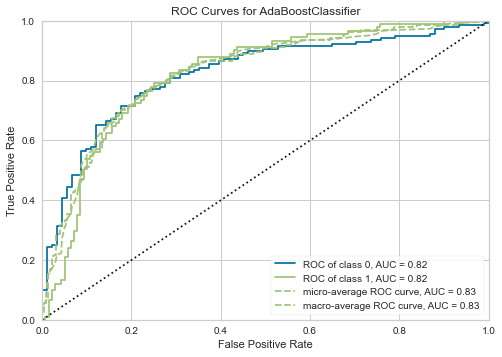

In [18]:
# AUC plot
plot_model(adaboost, plot = 'auc')

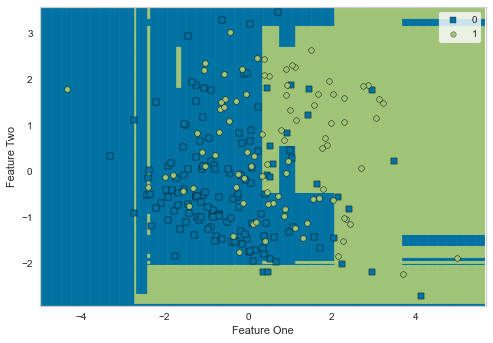

In [19]:
# Decision Boundary
plot_model(adaboost, plot = 'boundary')

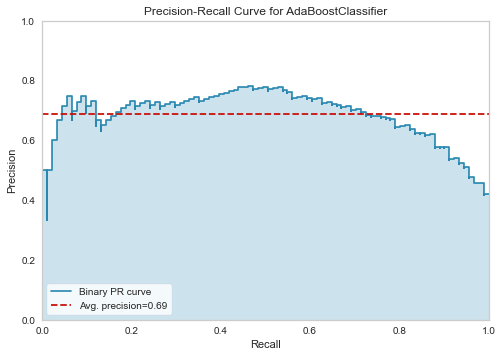

In [20]:
# Precision Recall Curve
plot_model(adaboost, plot = 'pr')

IntProgress(value=0, description='Processing: ', max=5)

KeyboardInterrupt: 

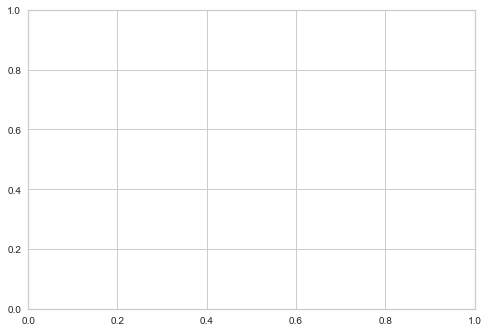

In [21]:
# Validation Curve
plot_model(adaboost, plot = 'vc')

In [24]:
evaluate_model(adaboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
# create a model
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.8272,0.5556,0.5556,0.5556,0.3333,0.3333
1,0.7593,0.8225,0.5556,0.6667,0.6061,0.4348,0.4385
2,0.6852,0.7191,0.5000,0.5294,0.5143,0.2817,0.2819
3,0.6296,0.7114,0.5556,0.4545,0.5000,0.2105,0.2132
4,0.7963,0.8395,0.5556,0.7692,0.6452,0.5075,0.5207
5,0.7407,0.7238,0.5000,0.6429,0.5625,0.3824,0.3884
6,0.6667,0.7176,0.4444,0.5000,0.4706,0.2286,0.2294
7,0.8679,0.9036,0.7647,0.8125,0.7879,0.6921,0.6928
8,0.7925,0.8464,0.6471,0.6875,0.6667,0.5162,0.5167
9,0.7358,0.7892,0.6471,0.5789,0.6111,0.4120,0.4135


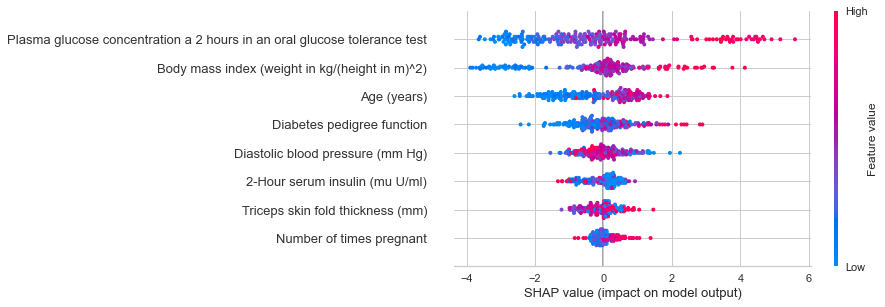

In [30]:
# summary plot
interpret_model(xgboost)

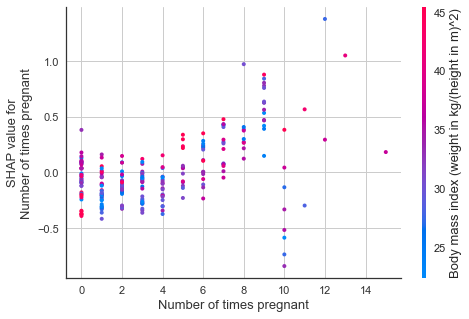

In [31]:
# correlation plot
interpret_model(xgboost, plot = 'correlation')

In [33]:
interpret_model(xgboost, plot = 'reason', observation = 10) 

In [4]:
# create a model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7610,0.6500,0.6190,0.6341,0.4105,0.4108
1,0.7037,0.6934,0.5000,0.6250,0.5556,0.3374,0.3421
2,0.8333,0.8551,0.8000,0.7619,0.7805,0.6463,0.6468
3,0.7593,0.8353,0.6500,0.6842,0.6667,0.4785,0.4788
4,0.8704,0.9434,0.7500,0.8824,0.8108,0.7132,0.7187
5,0.8148,0.8515,0.6500,0.8125,0.7222,0.5859,0.5941
6,0.6481,0.7757,0.4500,0.5294,0.4865,0.2215,0.2232
7,0.8491,0.8878,0.7368,0.8235,0.7778,0.6640,0.6664
8,0.8113,0.8220,0.6316,0.8000,0.7059,0.5698,0.5784
9,0.7358,0.8266,0.6842,0.6190,0.6500,0.4387,0.4401


In [5]:
# predict test / hold-out dataset
rf_holdout_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7706,0.8420,0.4930,0.6731,0.5691,0.4178,0.4272


In [6]:
predictions = predict_model(rf, data = diabetes)

In [7]:
deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws', 
             authentication =  {'bucket'  : 'pycaret-test'})

ImportError: awscli library not found. pip install awscli to use deploy_model function.

In [10]:
# creating model
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7162,0.5000,0.5556,0.5263,0.2703,0.2712
1,0.6296,0.6132,0.4000,0.5000,0.4444,0.1718,0.1742
2,0.7222,0.8265,0.6000,0.6316,0.6154,0.3982,0.3985
3,0.7593,0.8426,0.6500,0.6842,0.6667,0.4785,0.4788
4,0.7963,0.7706,0.7000,0.7368,0.7179,0.5587,0.5591
5,0.7407,0.8015,0.5500,0.6875,0.6111,0.4202,0.4261
6,0.7037,0.7603,0.5500,0.6111,0.5789,0.3514,0.3525
7,0.7925,0.8885,0.6842,0.7222,0.7027,0.5435,0.5439
8,0.7547,0.8421,0.6316,0.6667,0.6486,0.4605,0.4609
9,0.6981,0.7384,0.5789,0.5789,0.5789,0.3437,0.3437


In [11]:
# saving model
save_model(adaboost, model_name = 'ada_for_deployment')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Number of times '
                                                           'pregnant'],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_va...
                 ('dummy', Dummify(target='Class variable')),
                 ('fix_perfect', Remove_100(target='Class variable')),
                 ('clean_names', Clean_Colum_Names()),
                 

In [14]:
save_config('my_first_config')

In [15]:
# save_experiment(experiment_name = 'my_first_experiment')